In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 2.1.4
numpy version: 1.26.4
seaborn version: 0.12.2
sklearn version: 1.2.2


In [80]:
data = pd.read_csv('Desktop/big-mac-adjusted-index.csv', parse_dates =['date'])

In [92]:
data = data[(data['date'].dt.year == 2019) &  (data['date'].dt.month == 1)]

In [93]:
data.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
1022,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,20810.978188,3.400040,-0.43135,-0.50271,-0.40109,-0.29847,-0.37607
1023,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,58148.657774,4.420911,-0.04949,-0.16876,0.00110,0.17263,0.04292
1024,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9362.534656,3.087021,0.42174,0.24334,0.49740,0.75398,0.55995
1025,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,47946.778270,4.141975,-0.05053,-0.16967,0.00000,0.17135,0.04178
1026,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,42034.227332,3.980317,0.23350,0.07872,0.29914,0.52175,0.35341


In [82]:
data.shape

(1489, 14)

In [83]:
data.columns

Index(['date', 'iso_a3', 'currency_code', 'name', 'local_price', 'dollar_ex',
       'dollar_price', 'GDP_bigmac', 'adj_price', 'USD', 'EUR', 'GBP', 'JPY',
       'CNY'],
      dtype='object')

In [95]:
data.info

<bound method DataFrame.info of            date iso_a3 currency_code            name  local_price  \
1022 2019-01-01    ARG           ARS       Argentina        75.00   
1023 2019-01-01    AUS           AUD       Australia         6.10   
1024 2019-01-01    BRA           BRL          Brazil        16.90   
1025 2019-01-01    GBR           GBP         Britain         3.19   
1026 2019-01-01    CAN           CAD          Canada         6.77   
1027 2019-01-01    CHL           CLP           Chile      2640.00   
1028 2019-01-01    CHN           CNY           China        20.90   
1029 2019-01-01    COL           COP        Colombia     11900.00   
1030 2019-01-01    CZE           CZK  Czech Republic        85.00   
1031 2019-01-01    DNK           DKK         Denmark        30.00   
1032 2019-01-01    EGY           EGP           Egypt        40.00   
1033 2019-01-01    EUZ           EUR       Euro area         4.05   
1034 2019-01-01    HKG           HKD       Hong Kong        20.00   
10

In [94]:
data.isnull().sum()

date             0
iso_a3           0
currency_code    0
name             0
local_price      0
dollar_ex        0
dollar_price     0
GDP_bigmac       0
adj_price        0
USD              0
EUR              0
GBP              0
JPY              0
CNY              0
dtype: int64

In [84]:
data.describe().round(2)

,date,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
count,1489,1489.00,1489.00,1489.00,1489.00,1489.00,1489.00,1489.00,1489.00,1489.00,1489.00
mean,2014-03-21 22:02:00.886500864,9284.64,3524.51,3.41,25926.69,3.49,0.05,-0.18,-0.08,0.28,0.26
min,2000-04-01 00:00:00,1.10,0.30,0.64,0.00,1.55,-0.74,-0.83,-0.83,-0.72,-0.65
25%,2009-07-01 00:00:00,6.70,2.26,2.43,8274.16,3.00,-0.18,-0.36,-0.29,-0.01,-0.04
50%,2015-01-01 00:00:00,23.00,7.35,3.20,20187.69,3.45,0.00,-0.20,-0.10,0.23,0.16
75%,2020-01-14 00:00:00,115.00,42.50,4.23,40590.72,4.12,0.21,-0.03,0.08,0.52,0.44
max,2023-07-01 00:00:00,4000000.00,1600500.00,8.31,122483.55,5.80,1.92,0.82,1.15,2.72,3.14
std,NaN,175055.54,66853.30,1.30,20775.77,0.82,0.35,0.25,0.29,0.42,0.48


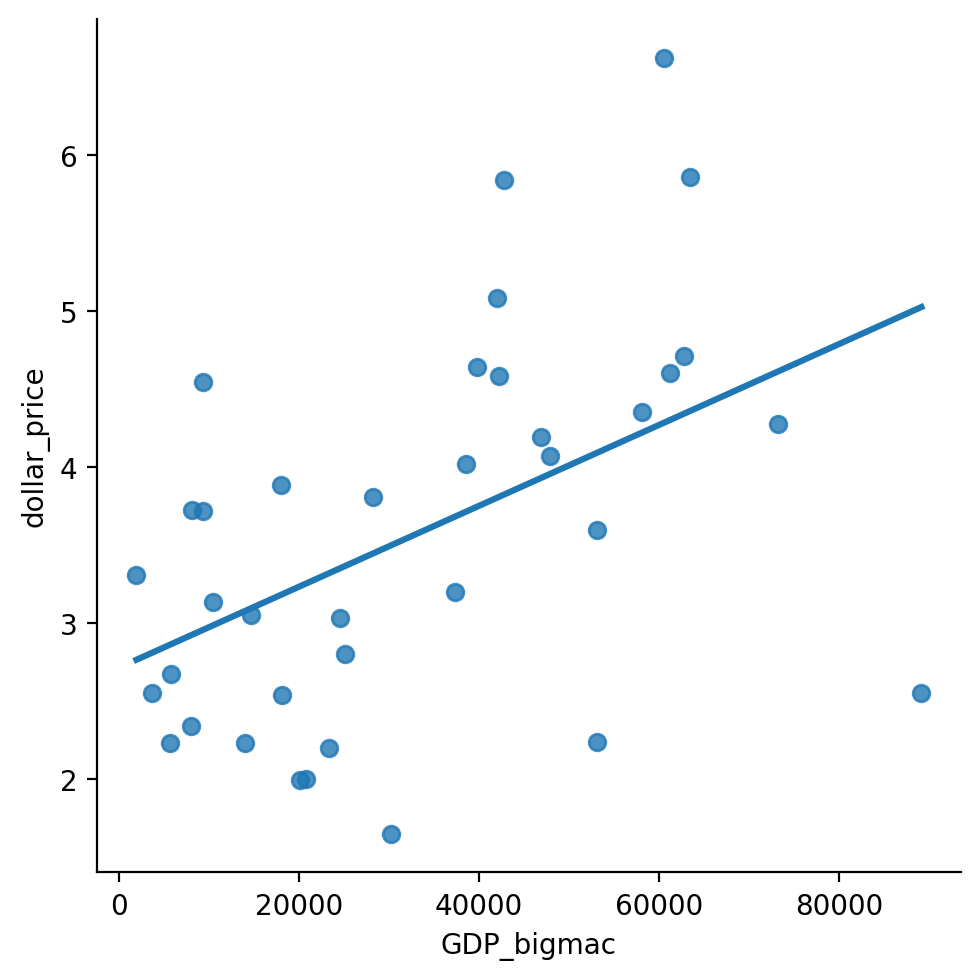

In [96]:
sns.lmplot(x = 'GDP_bigmac' , y = 'dollar_price', data = data , ci = None)

C:\Users\Bank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


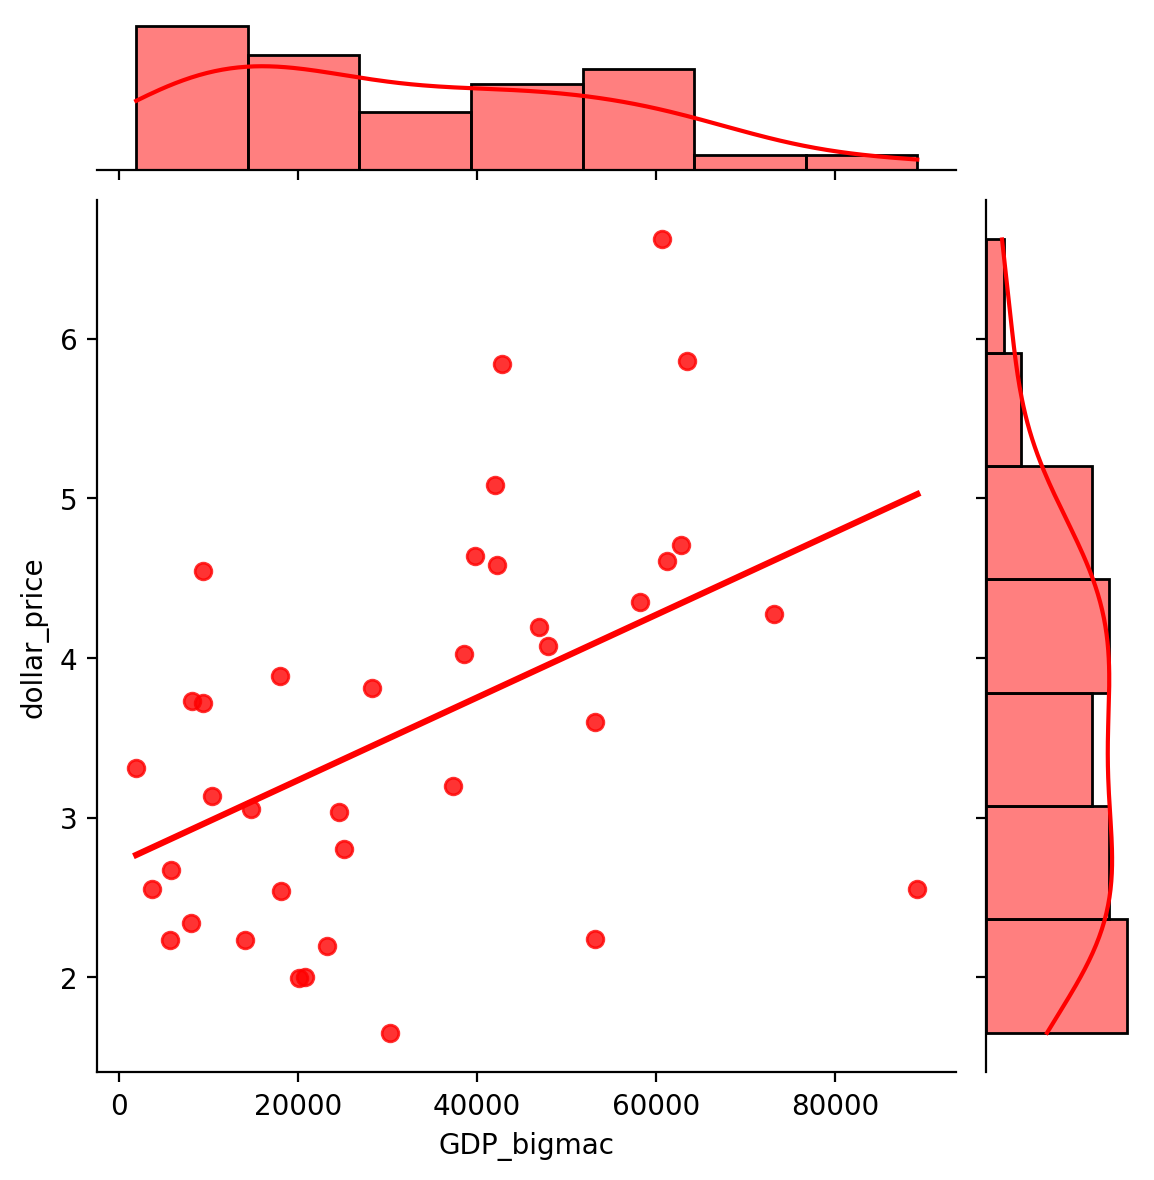

In [97]:
sns.jointplot(x = 'GDP_bigmac' , y = 'dollar_price', data = data , kind = 'reg' ,ci = None, color = 'red')

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [86]:
model = LinearRegression()
model

LinearRegression()

In [115]:
X = data[['GDP_bigmac']]
y = data['dollar_price']

In [116]:
model.fit(X,y)

LinearRegression()

In [117]:
model.score(X,y)

0.23344682453670118

In [118]:
model.coef_

array([2.58966215e-05])

In [119]:
model.intercept_

2.716707229073858

In [120]:
model.intercept_ + model.coef_ * 9000

array([2.94977682])

In [124]:
y_pred = model.predict(data[['GDP_bigmac']])
y_pred

array([3.25564125, 4.22256101, 2.95916525, 3.9583668 , 3.80525171,
       3.18345924, 3.09698691, 2.92650862, 3.44849611, 4.30140858,
       2.86324452, 3.74774643, 5.02613488, 3.35342801, 2.8113078 ,
       2.92433139, 3.80959835, 4.09293904, 3.31927281, 3.18394604,
       3.93073053, 4.3602329 , 2.76624967, 2.98597104, 2.86717336,
       3.36717286, 3.50011207, 3.68244654, 4.61258767, 3.07992932,
       3.71410371, 3.8237693 , 4.28648225, 4.09370905, 2.95842964,
       3.23678309, 4.34269866])

In [143]:
data.insert(7, 'model', y_pred)

In [144]:
data.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,model,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
1022,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,3.255641,20810.978188,3.400040,-0.43135,-0.50271,-0.40109,-0.29847,-0.37607
1023,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,4.222561,58148.657774,4.420911,-0.04949,-0.16876,0.00110,0.17263,0.04292
1024,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,2.959165,9362.534656,3.087021,0.42174,0.24334,0.49740,0.75398,0.55995
1025,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,3.958367,47946.778270,4.141975,-0.05053,-0.16967,0.00000,0.17135,0.04178
1026,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,3.805252,42034.227332,3.980317,0.23350,0.07872,0.29914,0.52175,0.35341


In [145]:
y_act = data['dollar_price']

In [146]:
mean_squared_error(y_act, y_pred)

1.0871398037122988